<a href="https://colab.research.google.com/github/HanzhouLiu/Deep-Learning-with-Python-Exercises/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# unzip .zip dataset file into /tmp dir
!unzip "/content/drive/My Drive/cats_and_dogs_small.zip" -d "/content/drive/My Drive"

Archive:  /content/drive/My Drive/cats_and_dogs_small.zip
   creating: /content/drive/My Drive/cats_and_dogs_small/
   creating: /content/drive/My Drive/cats_and_dogs_small/train/
   creating: /content/drive/My Drive/cats_and_dogs_small/train/cats/
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.0.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.1.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.2.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.3.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.4.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.5.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.6.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.7.jpg  
  inflating: /content/drive/My Drive/cats_and_dogs_small/train/cats/cat.8.jpg  
  inflating: /content/drive/My 

In [5]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [7]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/My Drive/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 5ms/step - loss: 0.7138 - acc: 0.5805 - val_loss: 0.4556 - val_acc: 0.8200
Epoch 2/30
100/100 [==============================] - 0s 4ms/step - loss: 0.4453 - acc: 0.7979 - val_loss: 0.3596 - val_acc: 0.8630
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3676 - acc: 0.8364 - val_loss: 0.3195 - val_acc: 0.8790
Epoch 4/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3154 - acc: 0.8734 - val_loss: 0.2941 - val_acc: 0.8880
Epoch 5/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2832 - acc: 0.8791 - val_loss: 0.2838 - val_acc: 0.8900
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2739 - acc: 0.8884 - val_loss: 0.2690 - val_acc: 0.8940
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2478 - acc: 0.8976 - val_loss: 0.2613 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

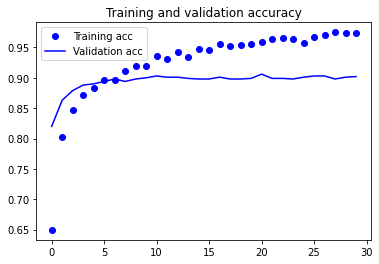

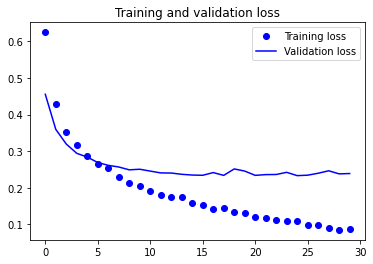

In [11]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [13]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 22s - loss: 0.6042 - acc: 0.6740 - val_loss: 0.4905 - val_acc: 0.7640
Epoch 2/30
100/100 - 21s - loss: 0.4812 - acc: 0.7865 - val_loss: 0.3825 - val_acc: 0.8570
Epoch 3/30
100/100 - 21s - loss: 0.4333 - acc: 0.8135 - val_loss: 0.3402 - val_acc: 0.8610
Epoch 4/30
100/100 - 21s - loss: 0.4095 - acc: 0.8090 - val_loss: 0.3084 - val_acc: 0.8860
Epoch 5/30
100/100 - 21s - loss: 0.3843 - acc: 0.8445 - val_loss: 0.2924 - val_acc: 0.8860
Epoch 6/30
100/100 - 21s - loss: 0.3781 - acc: 0.8270 - val_loss: 0.2806 - val_acc: 0.8960
Epoch 7/30
100/100 - 21s - loss: 0.3590 - acc: 0.8415 - val_loss: 0.2723 - val_acc: 0.8940
Epoch 8/30
100/100 - 21s - loss: 0.3506 - acc: 0.8425 - val_loss: 0.2686 - val_acc: 0.8970
Epoch 9/30
100/100 - 21s - loss: 0.3331 - acc: 0.8510 - val_loss: 0.2623 - val_acc: 0.8980
Epoch 10/30
100/100 - 20s - loss: 0.3351 - acc: 0.8625 - val_loss: 0.2588 - val_acc: 0.9000
Epoch 11/30
100/100 - 21s - loss: 0.3441 - acc: 0.8435 - val_loss: 0.2602 - val_acc: 0.89

In [20]:
model.save('/content/drive/My Drive/cats_and_dogs_small/cats_and_dogs_small_3.h5')

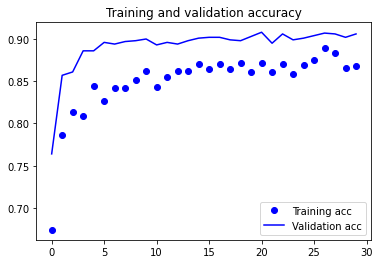

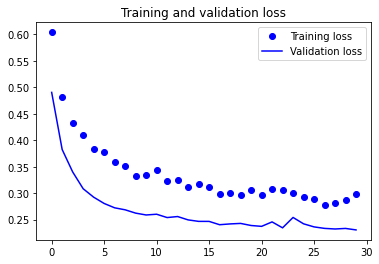

In [16]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [18]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 23s 221ms/step - loss: 0.3057 - acc: 0.8626 - val_loss: 0.2215 - val_acc: 0.9080
Epoch 2/100
100/100 [==============================] - 22s 219ms/step - loss: 0.2346 - acc: 0.9087 - val_loss: 0.2095 - val_acc: 0.9120
Epoch 3/100
100/100 [==============================] - 22s 219ms/step - loss: 0.2543 - acc: 0.8959 - val_loss: 0.2068 - val_acc: 0.9160
Epoch 4/100
100/100 [==============================] - 22s 219ms/step - loss: 0.2203 - acc: 0.9138 - val_loss: 0.2016 - val_acc: 0.9150
Epoch 5/100
100/100 [==============================] - 22s 220ms/step - loss: 0.1879 - acc: 0.9256 - val_loss: 0.2054 - val_acc: 0.9220
Epoch 6/100
100/100 [==============================] - 22s 218ms/step - loss: 0.2111 - acc: 0.9130 - val_loss: 0.1908 - val_acc: 0.9240
Epoch 7/100
100/100 [==============================] - 22s 222ms/step - loss: 0.1855 - acc: 0.9268 - val_loss: 0.2236 - val_acc: 0.9230
Epoch 8/100
100/100 [===========================

In [21]:
model.save('/content/drive/My Drive/cats_and_dogs_small/cats_and_dogs_small_4.h5')

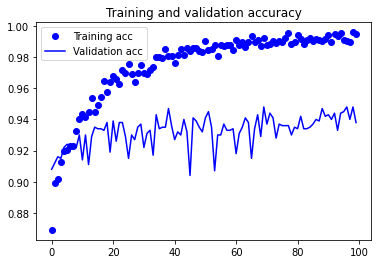

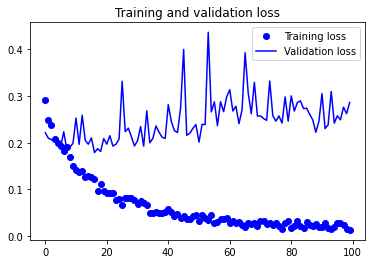

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

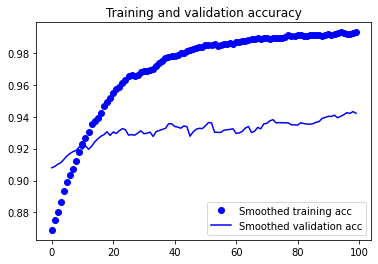

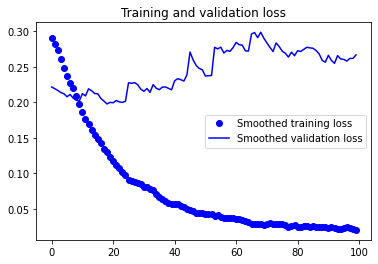

In [23]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc: 0.9380000233650208
